In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Machine Problem # 1

# PROBLEM 1

class SOR_Method:
    def __init__(self, A, b, omegas, tolerance, max_iter):
        self.A = A
        self.b = b
        self.omegas = omegas  # A list of relaxation factors to test
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.n = len(self.b)  # Determine the length of vector b
        self.x = np.zeros(self.n)  # Initialize vector x with zeros
        self.iterations = []
        self.x_solutions = []
        
    def gauss_seidel_model(self, x_bar_k_plus_1, i):
        x_bar_k_plus_1[i] = (self.b[i] - np.dot(self.A[i, :i], x_bar_k_plus_1[:i]) - np.dot(self.A[i, i+1:], self.x[i+1:])) / self.A[i, i]
        return x_bar_k_plus_1

    def successive_overrelaxation_method(self, omega):
        for k in range(self.max_iter):
            x_k_plus_1 = self.x.copy()
            x_bar_k_plus_1 = np.zeros(self.n)
            
            for i in range(self.n):
                x_bar_k_plus_1 = self.gauss_seidel_model(x_bar_k_plus_1, i)
                x_k_plus_1[i] = omega* x_bar_k_plus_1[i] + (1 - omega) * self.x[i]
            
            # Check for convergence using L∞ norm
            if np.max(np.abs(x_k_plus_1 - self.x)) < self.tolerance:
                return x_k_plus_1, k + 1
            
            self.x = x_k_plus_1  # Update x for the next iteration
            
        raise Exception("SOR did not converge within the specified number of iterations.")
    
    def omegas_solutions(self):
        
        omegas = self.omegas
        
        for omega in omegas:
            x_solution, num_iterations = self.successive_overrelaxation_method(omega)
            self.iterations.append(num_iterations)
            self.x_solutions.append(x_solution)
            
    def plot_omegas_solutions(self):
        plt.yscale('log')
        plt.plot(self.omegas, self.iterations, marker='o')
        plt.xlabel('Relaxation Factor (ω)')
        plt.ylabel('Number of Iterations for Convergence')
        plt.title('Number of Iterations vs. Relaxation Factor (ω)')
        plt.grid(True)
        plt.show()
        
        for i in range(len(self.omegas)):
            
            print("\033[1mOmega \033[0m" + str(i) + ":")
            print("                                    ")
            print("\033[1mω: \033[0m" + str(self.omegas[i]))
            print("\033[1miterations: \033[0m" + str(self.iterations[i]))
            print("\033[1mSolution: \033[0m")
            print(str(self.x_solutions[i]))



A matrix: 
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0

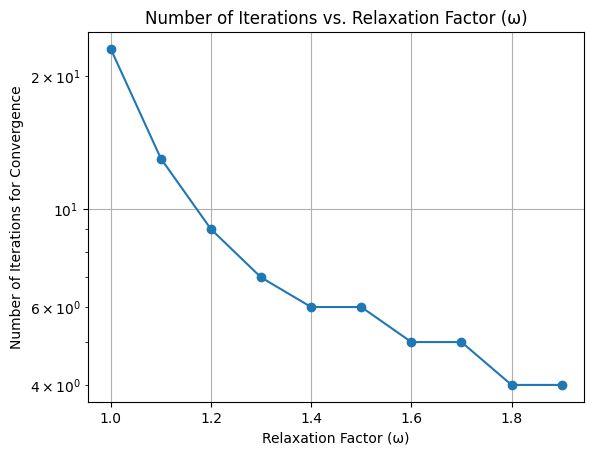

Omega 0:
                                    
ω: 1.0
iterations: 23
Solution: 
[-0.00468178 -0.00856141 -0.01174857 -0.0143445  -0.01644106 -0.01812029
 -0.01945431 -0.02050561 -0.02132765 -0.02196551 -0.02245672 -0.02283218
 -0.02311683 -0.02333035 -0.02348747 -0.02359792 -0.02366603 -0.02368978
 -0.02365947 -0.02355621 -0.0233502  -0.02299929 -0.02244793 -0.02162662
 -0.02045222 -0.01882891 -0.01664995 -0.01379999 -0.01015779 -0.00559919]
Omega 1:
                                    
ω: 1.1
iterations: 13
Solution: 
[-0.00610748 -0.0113659  -0.01586605 -0.01969406 -0.02293071 -0.02565088
 -0.0279231  -0.02980939 -0.0313651  -0.03263881 -0.03367234 -0.03450066
 -0.03515177 -0.03564654 -0.03599839 -0.03621295 -0.03628763 -0.03621121
 -0.0359634  -0.03551456 -0.03482548 -0.03384742 -0.03252235 -0.03078342
 -0.02855572 -0.02575726 -0.02230015 -0.01809196 -0.01303721 -0.0070389 ]
Omega 2:
                                    
ω: 1.2
iterations: 9
Solution: 
[-0.00698918 -0.01310834 -0.0184

In [3]:
# Problem 1

n = 30
h = 1 / (n + 1)
tolerance = 10**-3

# Define matrix A
A = np.diag(-2 * np.ones(n)) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)

# Define vector b
b = h**2 * np.ones(n)

# Define the omegas that will be used for the test
omegas = np.linspace(1.0, 1.9, 10)  

#Iterations
max_iter = 1000

print("A matrix: ")
print(A)
print("          ")

print("b matrix: ")
print(b)
print("          ")

Solution  = SOR_Method(A, b, omegas, tolerance, max_iter)
Solution.omegas_solutions()
Solution.plot_omegas_solutions()

In [4]:
# PROBLEM 2

class Thomas_Algorithm:
    def __init__(self, A, b):
        self.A = A
        self.A_a = np.tril(A, k=-1).copy()
        self.A_b = np.diagonal(A).copy()
        self.A_c = np.triu(A, k=1).copy()  
        self.b = b
        self.b_values = b.flatten()  
        self.n = len(b)
        self.x = np.zeros(self.n)

    def forward_elimination(self):
        for i in range(1, self.n):
            factor = self.A_a[i, i - 1] / self.A_b[i - 1]
            self.A_b[i] -= factor * self.A_c[i - 1, i - 1]  
            self.b_values[i] -= factor * self.b_values[i - 1]  # Update b_values

    def backward_substitution(self):   
        self.x[self.n - 1] = self.b_values[self.n - 1] / self.A_b[self.n - 1]  
        for i in range(self.n - 2, -1, -1):
            self.x[i] = (self.b_values[i] - self.A_a[i, i] * self.x[i + 1]) / self.A_b[i]  
            
            
    def print_x_vector(self):
        print("\033[1mA matrix: \033[0m")
        print(self.A)
        print("          ")
        print("\033[1mb vector: \033[0m")
        print(self.b)
        print("          ")
        print("\033[1mx vector: \033[0m")
        print("          ")
        print(self.x)


In [5]:
# Problem 2

n = 101
h = 1 / (n + 1)

# Define matrix A
A = np.diag(-2 * np.ones(n)) + np.diag(np.ones(n-1), -1) + np.diag(np.ones(n-1), 1)
    
# Define vector b
b = h**2 * np.ones(n)

x = Thomas_Algorithm(A, b)
x.forward_elimination()
x.backward_substitution()
x.print_x_vector()

A matrix: 
[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
          
b vector: 
[9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-05 9.61168781e-05
 9.61168781e-05 9.61168781e-05 9.61168781e-

In [6]:
# PROBLEM 3

class Biconjugate_Gradient_Method:
    def __init__(self, A, b, max_iter, tolerance=1e-6):
        self.A = A
        self.b = b
        self.n = len(self.b)
        self.x_o = np.ones(self.n)
        self.r_o = self.b - np.dot(self.A, self.x_o)
        self.p_o = self.Preconditioned(self.r_o)
        self.x_k = []
        self.r_k = []
        self.p_k = []    
        self.max_iter = max_iter
        self.tolerance = tolerance
        

    def DOT_PRODUCT(self, matrix_1, matrix_2):
        # Function for getting the dot product of two matrices
        result = np.dot(matrix_1, matrix_2)
        return result

    @staticmethod
    def Complex_Conjugate(vector):
        # Function to compute the complex conjugate of a vector
        return np.conjugate(vector)

    def Biconjugate_gradient(self):
        self.r_k.append(self.r_o)
        self.p_k.append(self.p_o)
        self.x_k.append(self.x_o)
        self.ast_r_k.append(self.ast_r_o)
        self.ast_p_k.append(self.ast_p_o)
        self.ast_x_k.append(self.ast_x_o)
        
        for k in range(self.max_iter):

            if np.all(self.DOT_PRODUCT(self.Complex_Conjugate(self.p_k[k]), self.DOT_PRODUCT(self.A, self.p_k[k]))) != 0:
                a_k = self.DOT_PRODUCT(self.Complex_Conjugate(self.r_k[k]), self.DOT_PRODUCT(self.Preconditioned(self.r_k[k]))) / self.DOT_PRODUCT(self.Complex_Conjugate(self.p_k[k]), self.DOT_PRODUCT(self.A, self.p_k[k]))
            else:
                a_k = 0

            # Update x_k
            x_k_plus_1 = self.x_k[k] + a_k * self.p_k[k]
            self.x_k.append(x_k_plus_1)
            
            # Compute B_k and a_k
            if np.all(self.DOT_PRODUCT(self.r_k[k - 1], self.r_k[k])) != 0:
                B_k = self.DOT_PRODUCT(self.r_k[k], self.Complex_Conjugate(self.r_k[k])) / self.DOT_PRODUCT(self.r_k[k - 1], self.r_k[k])
            else:
                B_k = 0
            

            # Update r_k
            r_k_plus_1 = self.r_k[k] - a_k * self.q_k[k]
            self.r_k.append(r_k_plus_1)

            # Update p_k
            p_k_plus_1 = self.p_k[k] - B_k * self.q_k[k]
            self.p_k.append(p_k_plus_1)

            # Update q_k
            q_k_plus_1 = self.DOT_PRODUCT(self.A, p_k_plus_1) - B_k * self.p_k[k]
            self.q_k.append(q_k_plus_1)

            # Check for convergence
            if np.linalg.norm(r_k_plus_1) < self.tolerance:
                return self.x_k[-1]  # Convergence achieved

        # Convergence not achieved
        raise ConvergenceError("Biconjugate Gradient did not converge within max_iter.")

    def print_x_vector(self):
        print("\033[1mA matrix: \033[0m")
        print(self.A)
        print("          ")
        print("\033[1mb vector: \033[0m")
        print(self.b)
        print("          ")
        print("\033[1mx vector: \033[0m")
        print("          ")
        print(self.x_k[-1])

class ConvergenceError(Exception):
    pass


In [7]:
# Problem 3

n = 300
max_iter = 500
h = 1 / (n + 1)

# Define matrix A
A = np.diag(-2 * np.ones(n)) + np.diag(np.ones(n-1), -1) + np.diag(np.ones(n-1), 1)
    
# Define vector b
b = h**2 * np.ones(n)

Solution = Biconjugate_Gradient_Method(A, b, max_iter)
Solution.Biconjugate_gradient()
Solution.print_x_vector()

AttributeError: 'Biconjugate_Gradient_Method' object has no attribute 'Preconditioned'

In [ ]:
# PROBLEM 4

def fixed_point_iteration(g, x_o, max_iter, tolerance):
    
    x = x_o
    for i in range(max_iter):
        x_i_plus_1 = g(x)
        if abs(x_i_plus_1 - x) < tolerance:
            return x_i_plus_1, i + 1 # Able to reach Convergence
        x = x_i_plus_1
    return x_i_plus_1, i + 1 # Ran out of iterations. Failed to reach Convergence

def g(x):
    return math.exp(math.log(4) - x * math.log(10))

# Initial guess and maximum number of iterations
x_o = 2.0
max_iter = 1000
tolerance = 1e-6

# Solve the equation using fixed-point iteration
root, iterations = fixed_point_iteration(g, x_o, max_iter, tolerance)

print(f"root: {root}")
print(f"Number of iterations: {iterations}")


root: 3.9962859476437558
Number of iterations: 1000


In [ ]:
# PROBLEM 5

class Newton_Raphson_Method:
    def __init__(self, Fx, Jx, x_o, omega=0.4, tolerance=1e-8, max_iter=100):
        self.Fx = Fx  # Function representing the system of equations
        self.Jx = Jx  # Jacobian matrix of partial derivatives
        self.x_o = x_o  # Initial guess
        self.tolerance = tolerance  # Convergence tolerance
        self.max_iter = max_iter  # Maximum number of iterations
        
    def Solve_L2_Norm(self, Vector):
        L2_Norm = np.linalg.norm(Vector)
        return L2_Norm
        
    def newton_rhapson_method(self):
        x = self.x_o
        
        for k in range(max_iter):
            # Compute F(x) and J(x) for the current x
            F_x = self.Fx(x)
            J_x = self.Jx(x)
            
            try:
                delta_x = np.linalg.solve(J_x, -F_x) # Δx = J⁻¹⋅-F
            except np.linalg.LinAlgError:
                raise Exception("Singular Jacobian matrix encountered. Non-convergence.")
                
            # x = x + Δx    
            x = x + delta_x
            
            # Check for convergence based on the norm of F(x)
            L2_Norm = self.Solve_L2_Norm(F_x)
            if L2_Norm < self.tolerance:
                return x  # Convergence achieved
            
        raise Exception("Maximum number of iterations reached. Non-convergence.")
  
        

In [ ]:
# problem 5

Fx = lambda x: np.array([x[0] + x[1] + x[2] - 4, x[0]**2 + x[1]**2 + x[2]**2 - 6, x[0]*x[1]*x[2] - 2])  # Fx Function

def Jacobian_Matrix(x):
    J_x = np.zeros((3, 3))  # Initialize a 3x3 Jacobian matrix

    # Compute the partial derivatives of each equation with respect to each variable
    J_x[0, 0] = 1
    J_x[0, 1] = 1
    J_x[0, 2] = 1

    J_x[1, 0] = 2 * x[0]
    J_x[1, 1] = 2 * x[1]
    J_x[1, 2] = 2 * x[2]

    J_x[2, 0] = x[1] * x[2]
    J_x[2, 1] = x[0] * x[2]
    J_x[2, 2] = x[0] * x[1]
    
    print(J_x)

    return J_x

x_o = np.array([5, 7, 8])  # Initial guess

Solution = Newton_Raphson_Method(Fx, Jacobian_Matrix, x_o)

Solution = Solution.newton_rhapson_method()

print("Solution:", Solution)

[[ 1.  1.  1.]
 [10. 14. 16.]
 [56. 40. 35.]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 2.07333333e+02 -7.02000000e+02  5.02666667e+02]
 [-8.82180000e+04  2.60548889e+04 -3.63870000e+04]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 2.39255467e+02 -3.82581538e+02  1.51326070e+02]
 [-1.44736402e+04  9.05139742e+03 -2.28836812e+04]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-2.93749864e+00 -2.10364823e+02  2.21302322e+02]
 [-1.16385559e+04 -1.62518817e+02  1.54486595e+02]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-2.94113476e+00 -1.02394669e+02  1.13335804e+02]
 [-2.90124555e+03 -8.33339682e+01  7.52891302e+01]]
[[   1.            1.            1.        ]
 [  -2.95578923  -48.35100398   59.3067932 ]
 [-716.88574854  -43.82459509   35.72884415]]
[[   1.            1.            1.        ]
 [  -3.01623067  -21.19375838   32.20998906]
 [-170.66268137  -24.28818925   15.98131603]]
[[  1.           1.           1.        ]
 [ -3.29194416  -7.23236